In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
enc = OneHotEncoder()
enc.fit([[0], [1]]) 
def names(number):
    if(number == 0):
        return 'Tumor'
    else:
        return 'Normal'

In [4]:
data = []
ans = []

for i in range(2):
    paths = []
    if i == 0:
        folder = 'yes'
        code = 0
    else:
        folder = 'no'
        code = 1
    for root, _, files in os.walk(f"{folder}"):
        for file in files:
            if '.jpg' in file:
                paths.append(os.path.join(root, file))
                

    for path in paths:
        img = Image.open(path)
        x = img.resize((128,128))
        x = np.array(x)
        if(x.shape == (128,128,3)):
            data.append(np.array(x))
            ans.append(enc.transform([[code]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
ans = np.array(ans)
ans = ans.reshape(139,2)

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, ans, test_size=0.2, shuffle=True, random_state=123)

In [9]:
history = model.fit(x_train, y_train, epochs=30, batch_size=40, verbose=1, validation_data=(x_test, y_test))

Epoch 1/30
3/3 [==============================] - 14s 571ms/step - loss: 64.7498 - val_loss: 67.9298
Epoch 2/30
3/3 [==============================] - 0s 56ms/step - loss: 24.1801 - val_loss: 56.8390
Epoch 3/30
3/3 [==============================] - 0s 56ms/step - loss: 11.1460 - val_loss: 15.1825
Epoch 4/30
3/3 [==============================] - 0s 57ms/step - loss: 3.9393 - val_loss: 6.9900
Epoch 5/30
3/3 [==============================] - 0s 56ms/step - loss: 7.2762 - val_loss: 5.7946
Epoch 6/30
3/3 [==============================] - 0s 58ms/step - loss: 2.9124 - val_loss: 7.3034
Epoch 7/30
3/3 [==============================] - 0s 54ms/step - loss: 1.7355 - val_loss: 12.1266
Epoch 8/30
3/3 [==============================] - 0s 56ms/step - loss: 2.6091 - val_loss: 10.7054
Epoch 9/30
3/3 [==============================] - 0s 56ms/step - loss: 1.0757 - val_loss: 6.5479
Epoch 10/30
3/3 [==============================] - 0s 56ms/step - loss: 0.2921 - val_loss: 4.4302
Epoch 11/30
3/3 [==

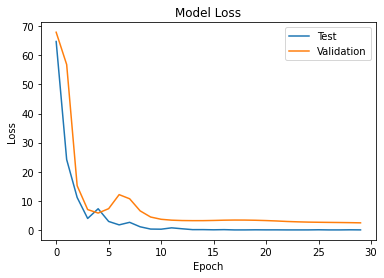

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

100.00% Confidence This Is Normal


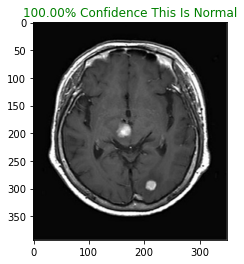

In [26]:
img = Image.open("no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]

plt.title(f"{(answ[0][classification]*100):.2f}% Confidence This Is {names(classification)}", color="GREEN")

imshow(img)
print(f"{(answ[0][classification]*100):.2f}% Confidence This Is {names(classification)}")

100.00% Confidence This Is a Tumor


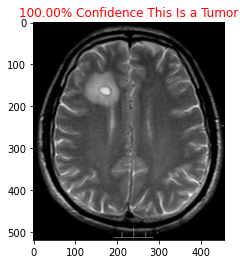

In [27]:
img = Image.open("yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]

plt.title(f"{(answ[0][classification]*100):.2f}% Confidence This Is a {names(classification)}", color="RED")

imshow(img)
print(f"{(answ[0][classification]*100):.2f}% Confidence This Is a {names(classification)}")